# **suivi d'entraînement avec Runkeeper**-bY AHMED

# Importation des données

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cardioActivities.csv')

# Exploration des données


In [3]:
data.head(2)

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Activity Id               508 non-null    object 
 2   Type                      508 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             508 non-null    float64
 5   Duration                  508 non-null    object 
 6   Average Pace              508 non-null    object 
 7   Average Speed (km/h)      508 non-null    float64
 8   Calories Burned           508 non-null    float64
 9   Climb (m)                 508 non-null    int64  
 10  Average Heart Rate (bpm)  294 non-null    float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     231 non-null    object 
 13  GPX File                  504 non-null    object 
dtypes: float64

In [5]:
data.isnull().sum()

,0
Date,0
Activity Id,0
Type,0
Route Name,507
Distance (km),0
Duration,0
Average Pace,0
Average Speed (km/h),0
Calories Burned,0
Climb (m),0


# Nettoyage des données


**1- drop 'route name'  et  'Friend's Tagged'  et 'Notes':**

In [6]:
data=data.drop(['Friend\'s Tagged','Route Name','Notes'],axis=1)

**2- converte le type de ' date' , 'duartion' et 'Average Pace' :**

coverte le type de date et splite  column en  date et time

In [7]:
data['time'] = data['Date'].astype(str).str.split(' ', expand=True)[1]
data['time']=pd.to_datetime(data['time'], format='%H:%M:%S').dt.time

In [8]:
data['Date']=data['Date'].astype(str).str.split(' ', expand=True)[0]
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')

converte type duration et average pace

In [9]:
normalized_durations = data["Duration"].apply(lambda x: "00:" + x if x.count(":") == 1 else x)
data["Duration"] = pd.to_datetime(normalized_durations, format='%H:%M:%S').dt.time

## remplace les valeurs null :

In [10]:
a=data['Average Heart Rate (bpm)'].isnull().sum()
f=a/len(data)
print(f)

0.421259842519685


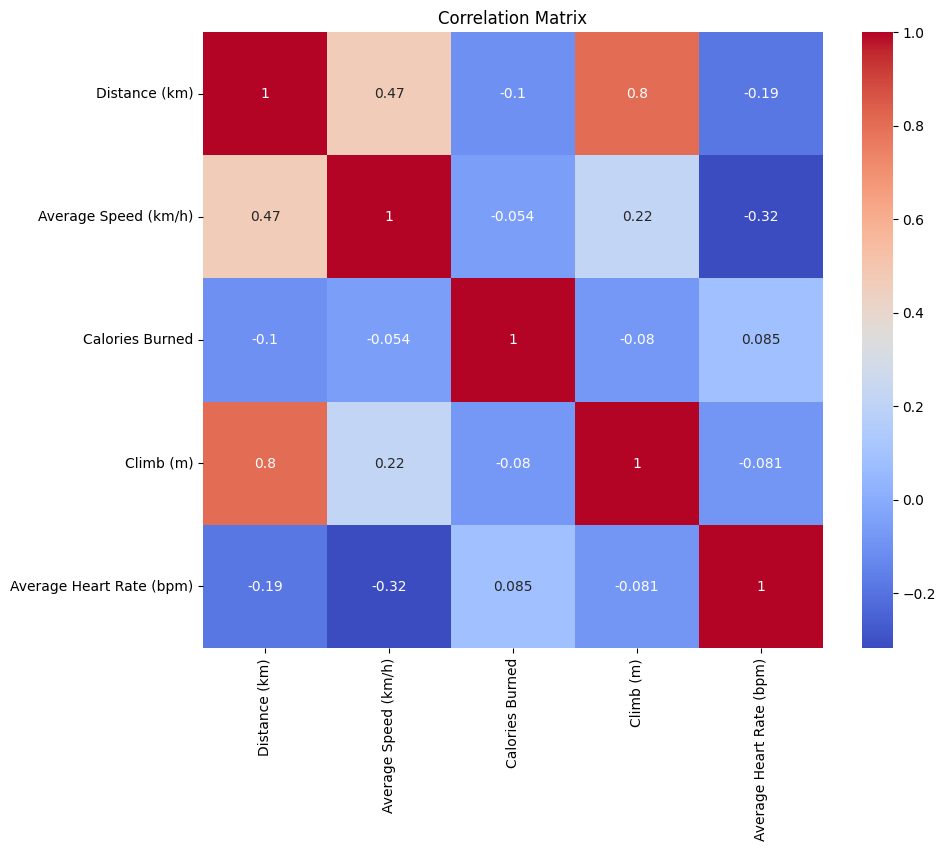

In [11]:
numerical_data = data.select_dtypes(include=['number'])
coormatrix = numerical_data.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(coormatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


(array([ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  2.,  5.,  5., 10., 32.,
        84., 74., 37., 22., 12.,  4.,  2.]),
 array([ 77.  ,  81.75,  86.5 ,  91.25,  96.  , 100.75, 105.5 , 110.25,
        115.  , 119.75, 124.5 , 129.25, 134.  , 138.75, 143.5 , 148.25,
        153.  , 157.75, 162.5 , 167.25, 172.  ]),
 <BarContainer object of 20 artists>)

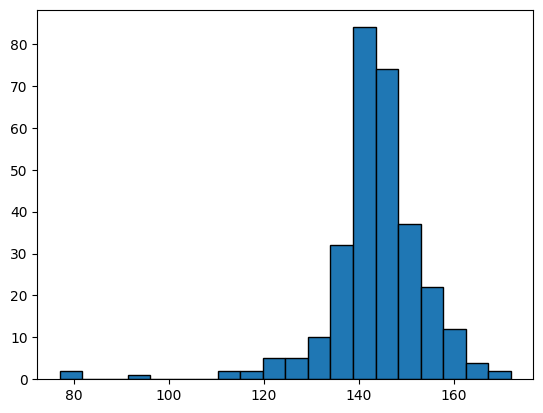

In [12]:
plt.hist(data['Average Heart Rate (bpm)'], bins=20, edgecolor='k')


In [13]:
data['Average Heart Rate (bpm)'].fillna(data['Average Heart Rate (bpm)'].mean(), inplace=True)

<ipython-input-13-c3fd37e5fc0e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Average Heart Rate (bpm)'].fillna(data['Average Heart Rate (bpm)'].mean(), inplace=True)


(array([  2.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   2.,   5.,   5.,
         10.,  32.,  84., 288.,  37.,  22.,  12.,   4.,   2.]),
 array([ 77.  ,  81.75,  86.5 ,  91.25,  96.  , 100.75, 105.5 , 110.25,
        115.  , 119.75, 124.5 , 129.25, 134.  , 138.75, 143.5 , 148.25,
        153.  , 157.75, 162.5 , 167.25, 172.  ]),
 <BarContainer object of 20 artists>)

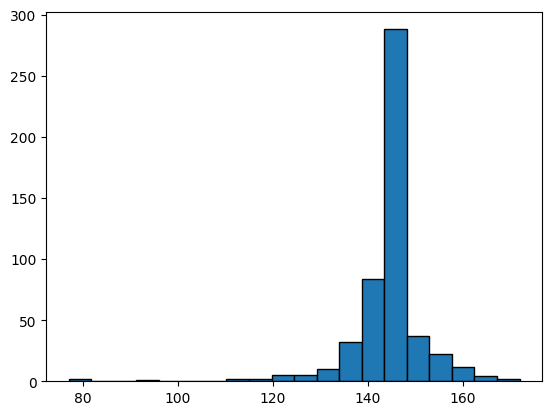

In [14]:
plt.hist(data['Average Heart Rate (bpm)'], bins=20, edgecolor='k')

In [15]:
data.isnull().sum()

,0
Date,0
Activity Id,0
Type,0
Distance (km),0
Duration,0
Average Pace,0
Average Speed (km/h),0
Calories Burned,0
Climb (m),0
Average Heart Rate (bpm),0


# Analyse des données


**Notre données aprés nettoyage :**

In [16]:
data.head(2)

,Date,Activity Id,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),GPX File,time
0,2018-11-11,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,10.44,00:58:40,5:37,10.68,774.0,130,159.0,2018-11-11-140512.gpx,14:05:12
1,2018-11-09,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,12.84,01:14:12,5:47,10.39,954.0,168,159.0,2018-11-09-150235.gpx,15:02:35


## **Quelle était la durée et la distance de mes entraînements ?**

les mois :

In [30]:
month = data['Date'].dt.month
month.unique()

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 12], dtype=int32)

calcule la duration en seconde :

In [31]:
def duration_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second
duration_second = data['Duration'].apply(duration_to_seconds)
duration_second

,Duration
0,3520
1,4452
2,4516
3,4465
4,4370
...,...
503,819
504,1076
505,823
506,960


In [43]:
data2 = data
data2['month'] = month
data2['duration_second'] = duration_second
table = data2[['month', 'duration_second','Distance (km)']]
table.groupby('month').sum()

,duration_second,Distance (km)
month,,
1,89966,265.11
2,104733,305.30
3,105721,310.76
4,176427,546.42
5,200461,689.10
6,222698,731.32
7,219753,673.23
8,238679,791.93
9,210037,712.33


## **Suis-je en progression ?**

In [44]:
table2 = data2[['month','Distance (km)','Average Speed (km/h)']]
table2.groupby('month').mean()

,Distance (km),Average Speed (km/h)
month,,
1,9.141724,10.683793
2,8.722857,10.750286
3,10.024516,10.487419
4,11.625957,10.907234
5,12.761111,12.510741
6,14.626400,11.769800
7,13.200588,11.118824
8,13.653966,11.737414
9,14.246600,12.105200


## **Quels ont été mes meilleurs accomplissements ?**

**Distance la plus longue :**

In [46]:
data2['Distance (km)'].max()

49.18

**Séance avec la meilleure vitesse moyenne**

In [47]:
data2['Average Speed (km/h)'].max()

24.33

**Calories brûlées les plus élevées**

In [48]:
data2['Calories Burned'].max()

4072685.0